In [7]:
from __future__ import division, print_function

# The Golden Ratio

https://en.wikipedia.org/wiki/Golden_ratio

http://mathworld.wolfram.com/GoldenRatio.html

http://www.maths.surrey.ac.uk/hosted-sites/R.Knott/Fibonacci/phi.html

## Introduction and background on golden rectangle and golden ratio.

The equality of the aspect ratios of the two rectangles is expressed by the equation
$\dfrac{1}{\phi} = \dfrac{\phi - 1}{1}$.

We re-write this equation to standard polynomial form $\phi^{2} - \phi -1 = 0$.

## Quadratic Formula

We first solve this 2nd-order polynomial using the quadratic formula:
$x = \dfrac{-b \pm \sqrt{b^2 - 4ac}}{2a}$

For solving for $\phi$, $a = 1, b = -1, c = -1$.

In [8]:
from numpy import sqrt

a, b, c = 1, -1, -1

(-b + sqrt(b**2 - 4 * a * c))/2, (-b - sqrt(b**2 - 4 * a * c))/2

(1.6180339887498949, -0.6180339887498949)

For the exact $\phi$, we will use the positive root produced by the quadratic formula.

$\phi = \dfrac{(1 + \sqrt{5})}{2}$

In [66]:
phi = (1 + sqrt(5))/2
phi

1.6180339887498949

We can express the negative root in terms of the positive one.

In [67]:
1-phi == (1 - sqrt(5))/2

True

Let's also confirm that these values of $\phi$ do satisfy the specified relationship.

In [86]:
phi**2 - phi - 1 == 0

True

In [79]:
phi - 1/phi ==  1

True

In [80]:
phi == 1 + 1/phi

True

In [81]:
phi == (phi + 1)/phi

True

In [82]:
1/phi == phi - 1

False

In [83]:
1/phi - (phi - 1)

-1.1102230246251565e-16

In [107]:
phi * (1/phi) == phi * (phi - 1)

False

## Polynomial Root Finder

Alternatively, we can find the roots using a general polynomial root finder such as _numpy.roots_.

The polynomial coefficients are 1, -1, -1.

In [56]:
from numpy import roots

p = (1, -1, -1)
r = roots(p)
r

array([ 1.61803399, -0.61803399])

In [57]:
r[0]

1.6180339887498949

In [59]:
r[0] == phi

True

## General Function Solver

We can also use a general function solver such as _scipy.optimize.fsolve_ to find the roots of the function.

This is the python equivalent to MATLABZ's $fzero$.

In [13]:
from scipy.optimize import fsolve

In [14]:
#f = lambda x: 1./x - (x - 1) # leads to division by zero problems
f = lambda x: x**2 - x - 1

In [61]:
r1, r2 = fsolve(f, 1)[0], fsolve(f, -1)[0]
r1, r2

(1.6180339887498947, -0.61803398874989479)

In [62]:
phi == r1

False

In [63]:
r1 - phi

-2.2204460492503131e-16

In [16]:
for n in range(-10, 10):
    print(n, fsolve(f, n)[0])

-10 -0.61803398875
-9 -0.61803398875
-8 -0.61803398875
-7 -0.61803398875
-6 -0.61803398875
-5 -0.61803398875
-4 -0.61803398875
-3 -0.61803398875
-2 -0.61803398875
-1 -0.61803398875
0 -0.61803398875
1 1.61803398875
2 1.61803398875
3 1.61803398875
4 1.61803398875
5 1.61803398875
6 1.61803398875
7 1.61803398875
8 1.61803398875
9 1.61803398875


## Symbolic Computation

We can also solve the equation symbolically using a Computer Algebra System (CAS) such as _sympy_.

In [17]:
from sympy import Symbol, N
from sympy.solvers import solve

In [18]:
x = Symbol('x')

In [19]:
r = solve(1/x - x + 1)
r

[1/2 + sqrt(5)/2, -sqrt(5)/2 + 1/2]

In [20]:
r2 = solve(x**2 - x - 1)
r2

[1/2 + sqrt(5)/2, -sqrt(5)/2 + 1/2]

In [21]:
N(r[0]), N(r[1])

(1.61803398874989, -0.618033988749895)

In [64]:
phi == N(r[0])

True

## Visualization

We can also plot the polynomial equation to visualize the function zeros.  Here, we use the _sympy.mpmath.plot_ to plot the golden ratio polynomial defined earlier.

This is the closest python equivalent to MATLAB's _ezplot_.

In [22]:
from sympy import mpmath

In [23]:
#f = lambda x: 1./x - (x - 1)
#f = lambda x: x**2 - x - 1

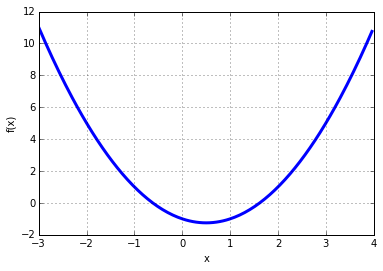

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt

mpmath.plot(f, [-3, 4], [-2, 12])

In [25]:

from numpy import arange

In [44]:
x = arange(-3, 4, .05)
y = [f(a) for a in x]

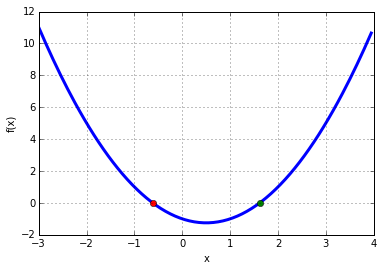

In [51]:
plt.figure(1)
plt.plot(x, y, linewidth=3)
plt.grid(which='Both')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.xlim(-3, 4)
plt.ylim(-2, 12)

plt.plot(phi, 0, 'go')
plt.plot(1-phi, 0, 'ro')

## Continued Fractions

We can also express the Golden Ratio as a continued fraction of the form:

$x = a_0 + \cfrac{1}{a_1 + \cfrac{1}{a_2 + \cfrac{1}{\ddots + \cfrac{1}{a_m} } } } $

For the Golden Ratio, the $a_{i}$'s are always 1:

$\phi = 1 + \cfrac{1}{1 + \cfrac{1}{1 + \cfrac{1}{\ddots + \cfrac{1}{1} } } } $

Using this approach, we compute $\phi$ by iteratively expanding the continued fraction until the desired precision is achieved.

[Example of fixed-point iteration.]


In [22]:
def goldfract(n):
    '''Based on Moler Numerical Computing with MATLAB'''
    
    p = '1'
    for k in range(0, n):
        p = '1+1/(' + p + ')'
        
    print(p)
    
    approx_phi = eval(p)
    
    # computation of the continued fraction
    p, q = 1, 1
    for k in range(0, n):
        p, q = p + q, p
        
    print("%d/%d" % (p, q))
       
    
    exact_phi = (1+sqrt(5))/2
    
    error = approx_phi - exact_phi
    
    print("Approx = %0.30g" % approx_phi)
    print("Exact = %0.30g" % exact_phi)
    print("Error = %0.30g" % error)

In [23]:
for n in range(4):
    goldfract(n)

1
1/1
Approx = 1
Exact = 1.61803398874989490252573887119
Error = -0.618033988749894902525738871191
1+1/(1)
2/1
Approx = 2
Exact = 1.61803398874989490252573887119
Error = 0.381966011250105097474261128809
1+1/(1+1/(1))
3/2
Approx = 1.5
Exact = 1.61803398874989490252573887119
Error = -0.118033988749894902525738871191
1+1/(1+1/(1+1/(1)))
5/3
Approx = 1.66666666666666651863693004998
Exact = 1.61803398874989490252573887119
Error = 0.0486326779167716161111911787884


In [24]:
from fractions import Fraction

exact_phi = (1 + sqrt(5))/2

p, q = 1, 1
for i in range(0, 10):
    approx_phi = float(Fraction(p, q))
    error_phi = approx_phi - exact_phi
    print("%d/%d = %.20f" % (p, q, approx_phi))
    print("error: %.20f" % (error_phi))
          
    p, q = p + q, p

1/1 = 1.00000000000000000000
error: -0.61803398874989490253
2/1 = 2.00000000000000000000
error: 0.38196601125010509747
3/2 = 1.50000000000000000000
error: -0.11803398874989490253
5/3 = 1.66666666666666674068
error: 0.04863267791677183816
8/5 = 1.60000000000000008882
error: -0.01803398874989481371
13/8 = 1.62500000000000000000
error: 0.00696601125010509747
21/13 = 1.61538461538461541878
error: -0.00264937336527948375
34/21 = 1.61904761904761906877
error: 0.00101363029772416624
55/34 = 1.61764705882352943789
error: -0.00038692992636546464
89/55 = 1.61818181818181816567
error: 0.00014782943192326314


In [25]:
phi

1.6180339887498949

In [26]:
phi - 1/phi

1.0